In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.lib.stride_tricks import sliding_window_view as swv
from scipy.optimize import curve_fit as fit 

In [17]:
ex_loss = np.loadtxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/loss_for_window.csv')
ex_val_loss = np.loadtxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/val_loss_for_window.csv')
epochs = np.arange(1,ex_loss.shape[0]+1)


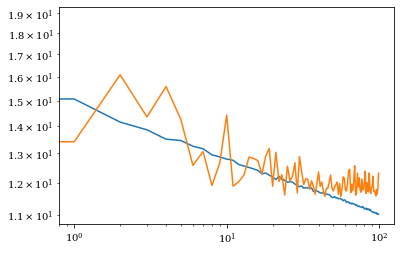

In [13]:
plt.loglog(epochs,ex_loss)
plt.loglog(epochs,ex_val_loss)

In [24]:
##Make Window of the datasets to make small lines to fit after the inital learning which tends to be abit mad
window = 30
start = 10
##Logarithm is take so that I can restric my poly fit to one param
strided_epochs   = swv(     np.log(epochs)[start:],window_shape=window)
strided_loss     = swv(    np.log(ex_loss)[start:],window_shape=window)
strided_val_loss = swv(np.log(ex_val_loss)[start:],window_shape=window)

def f(x,a0,a1):
    return a1*x + a0
bounds = (-np.inf,0.01)

l_grads = []
v_grads = []
l_errors = []
v_errors = []


for win_e,win_l,win_v in zip(strided_epochs,strided_loss,strided_val_loss):
    l_param ,l_error = fit(f,win_e,win_l,p0 = [0,-1])
    l_grads.append(l_param[1])
    l_errors.append(np.sqrt(np.diag(l_error))[1])

    v_param ,v_error = fit(f,win_e,win_v,p0 = [0,-1])
    v_grads.append(v_param[1])
    v_errors.append(np.sqrt(np.diag(v_error))[1])

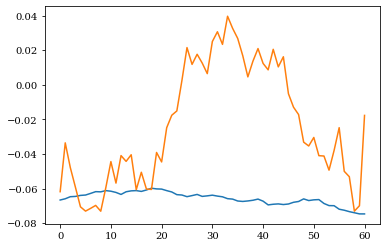

In [26]:
x = range(len(l_grads))
plt.plot(x,l_grads)
plt.plot(x,v_grads)